<blockquote>
<pre style="padding-left: 280px;"><span style="text-decoration: underline;"><span style="font-size: 14pt;"><strong><code>House Sales in King County, USA </code></strong></span></span></pre>
</blockquote>

<p style="text-align: center;"><strong>About Dataset</strong></p>
<p style="text-align: center;"><strong>This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.</strong></p>
<p style="text-align: center;"><strong>It's a great dataset for evaluating simple regression models.</strong></p>

<p><strong>IMPORTING LIBRARIES🔖</strong></p>

In [75]:
import os
import math
import xgboost
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [76]:
from time import time
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [77]:
data = pd.read_csv('Dataset/kc_house_data.csv')

In [78]:
pd.set_option('display.max_column',None)

In [79]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [80]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [81]:
data.shape

(21613, 21)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [83]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [84]:
df_train=data.copy()
df_train.rename(columns ={'price': 'SalePrice'}, inplace =True)

In [85]:
df_train.head(10)

,id,date,SalePrice,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<p><strong>DATA CLEANING AND PREPROCESSING🧹</strong></p>

In [86]:
print(len(data))

21613


In [87]:
print(len(data.columns))

21


In [88]:
print(data.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


FINDING CORRELATION

In [89]:
features = data.iloc[:,3:].columns.tolist()
target = data.iloc[:,2].name

<Axes: >

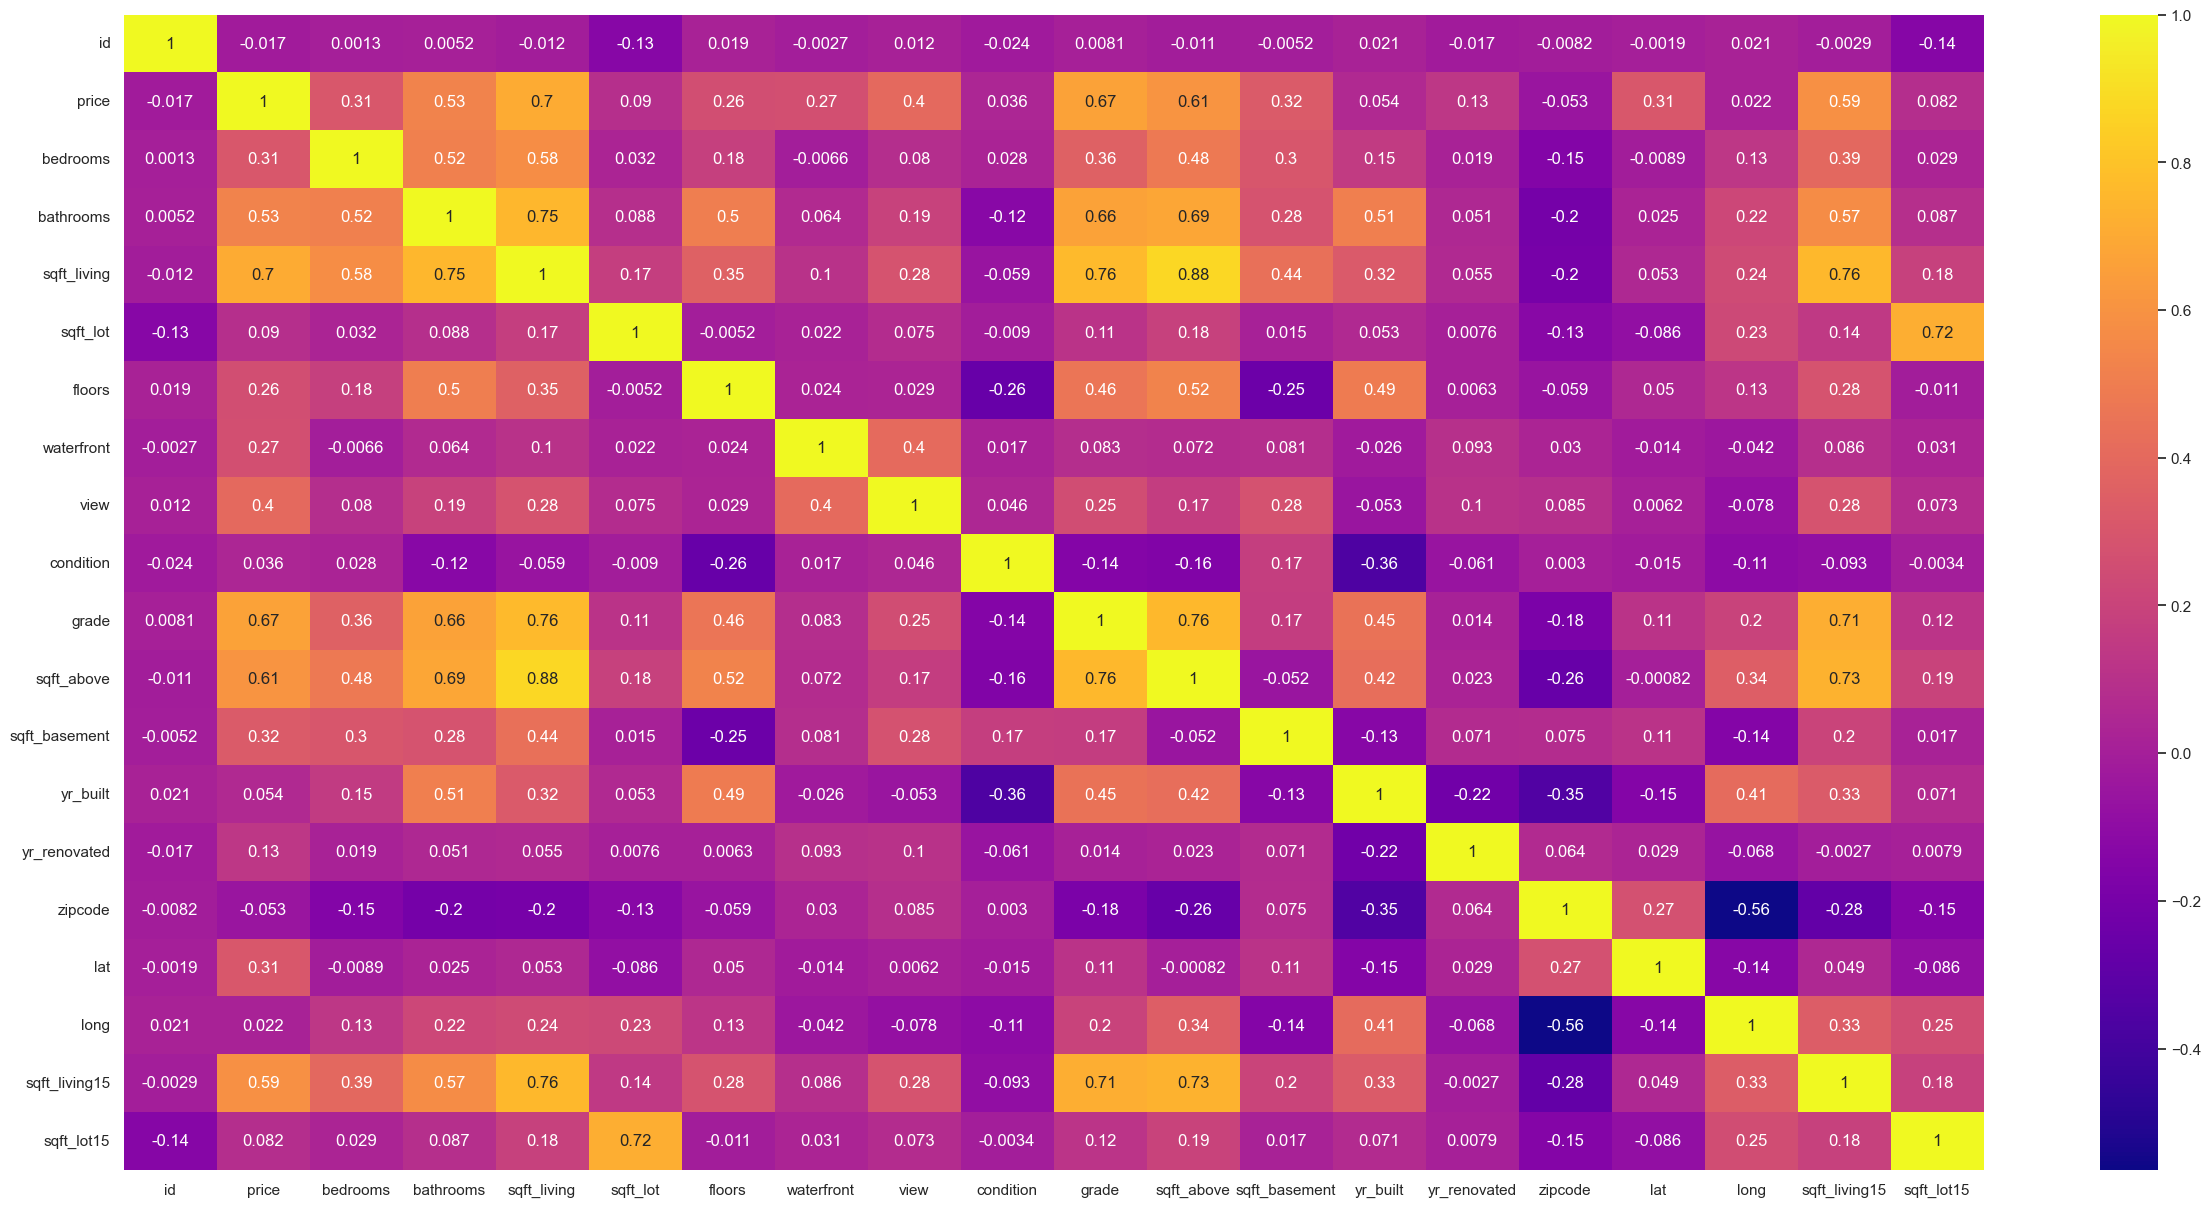

In [90]:
plt.figure(figsize=(30,15))
sns.heatmap(data.corr() , annot=True , cmap='plasma')

In [91]:
numerical = [ i for i in data.columns if data[i].dtypes!= 'O']
categorical = [ i for i in data.columns if data[i].dtypes == 'O']

<p><strong>EDA or DATA VISUALIZATION📊</strong></p>

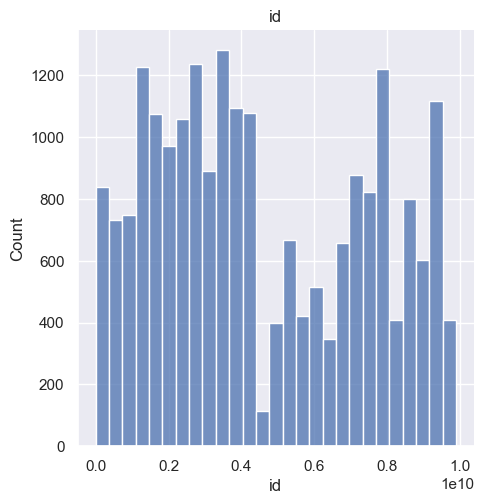

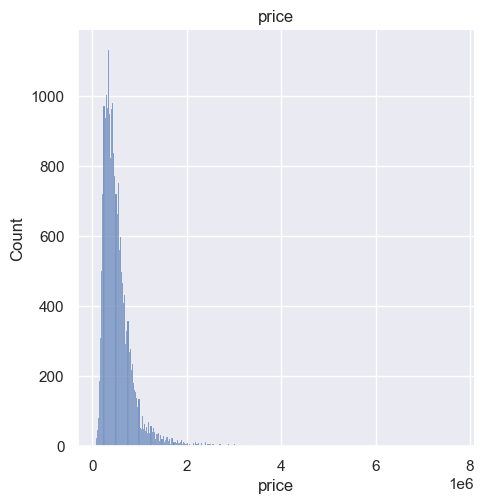

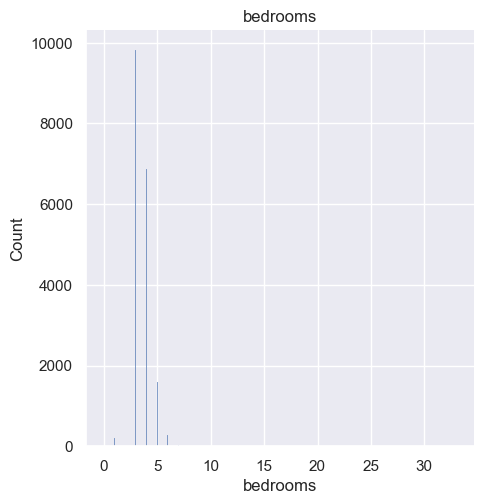

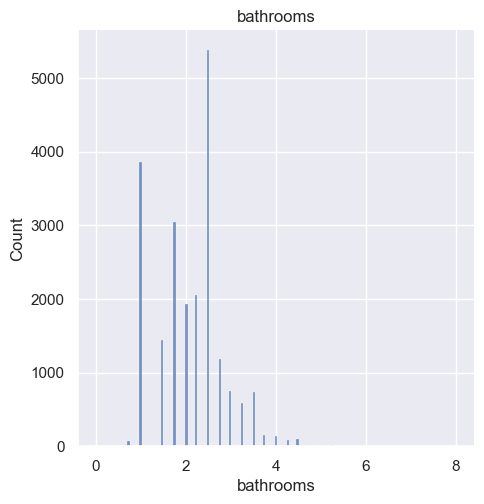

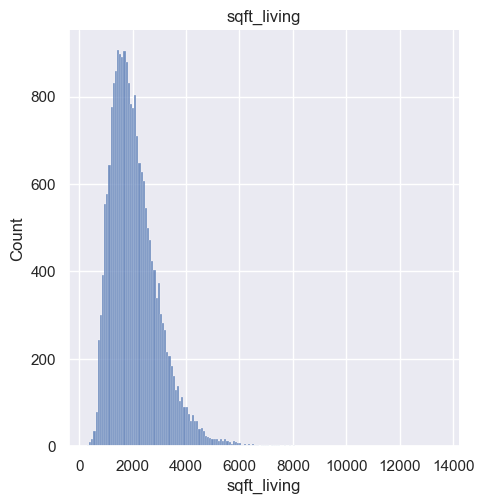

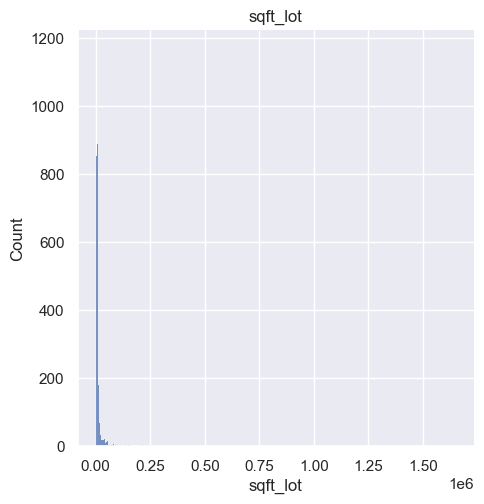

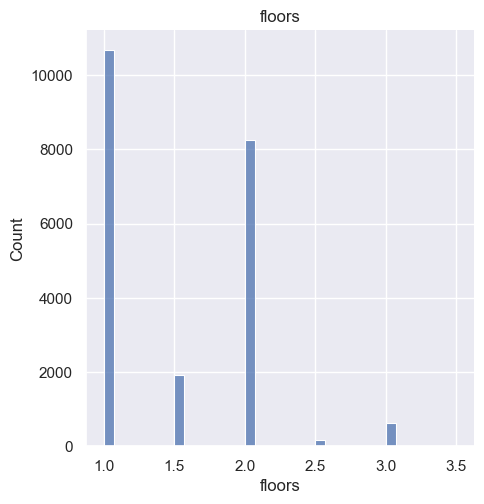

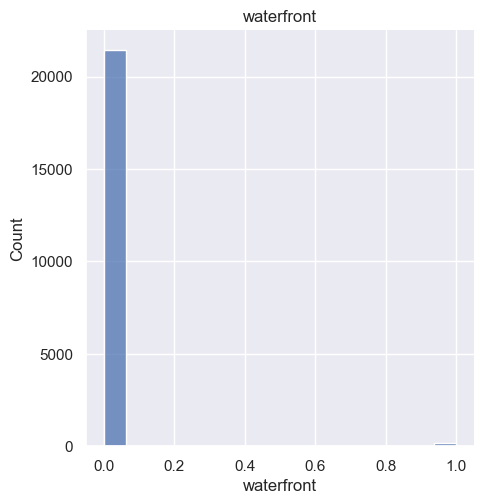

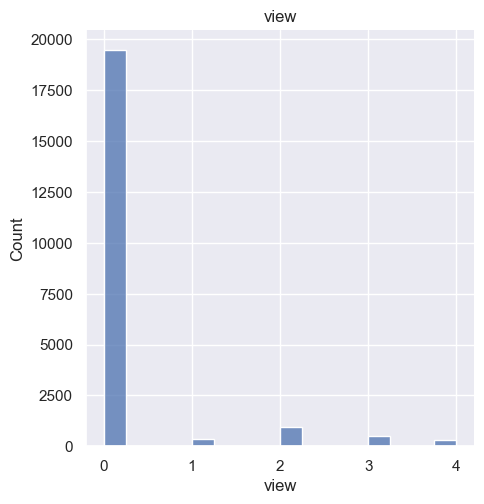

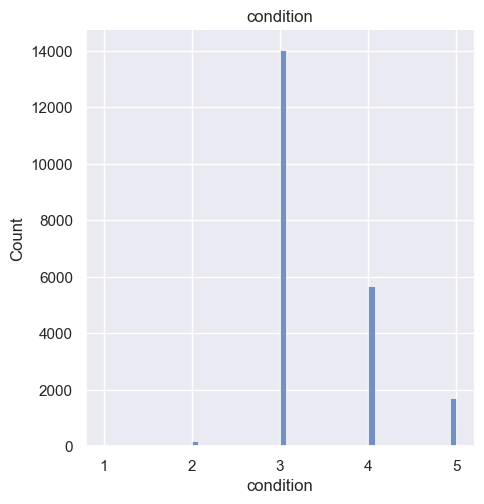

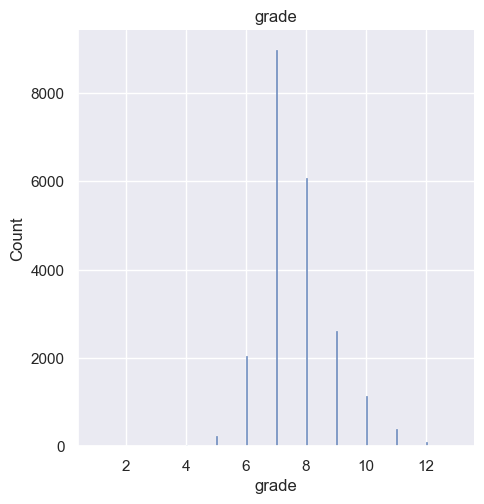

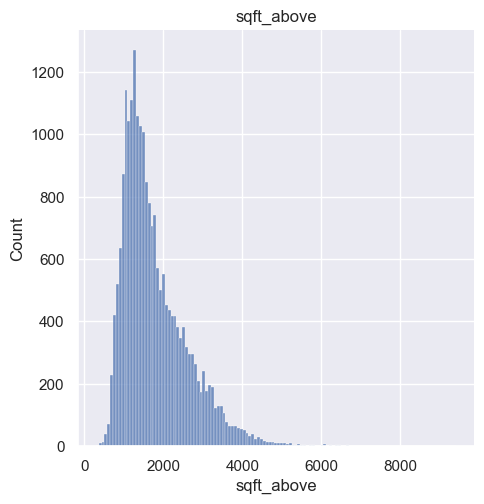

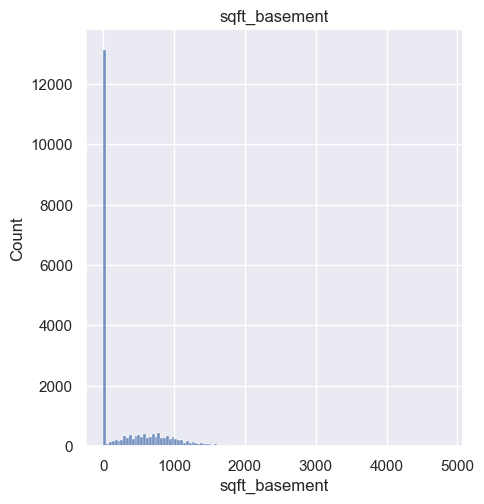

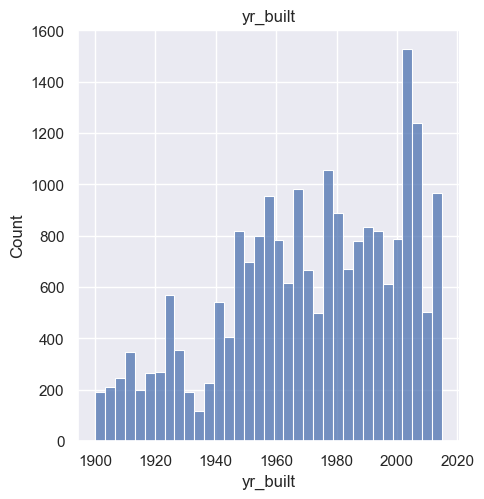

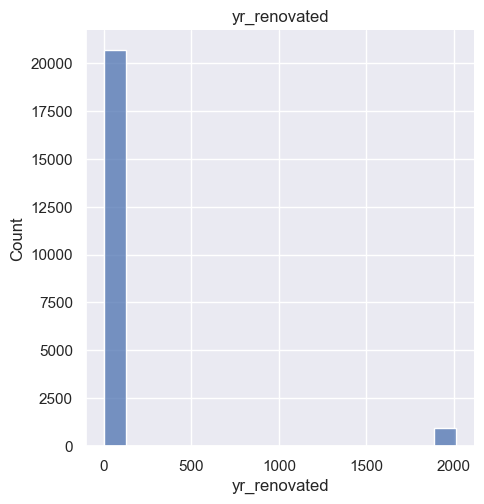

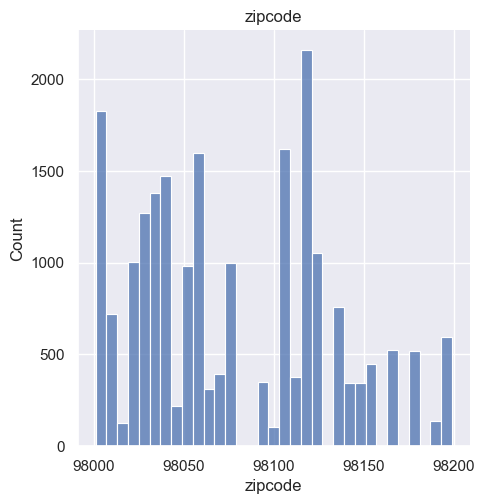

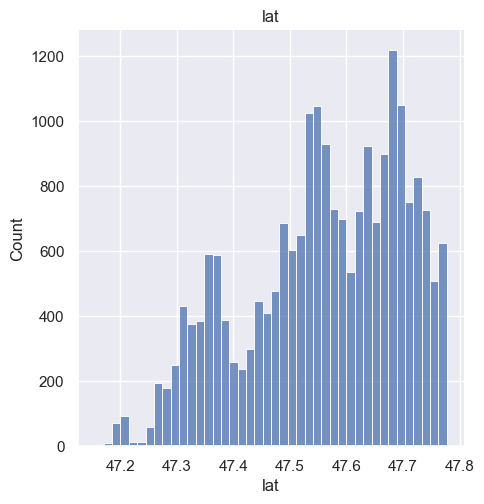

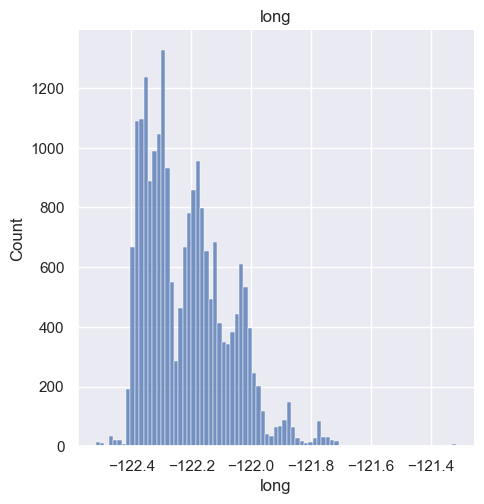

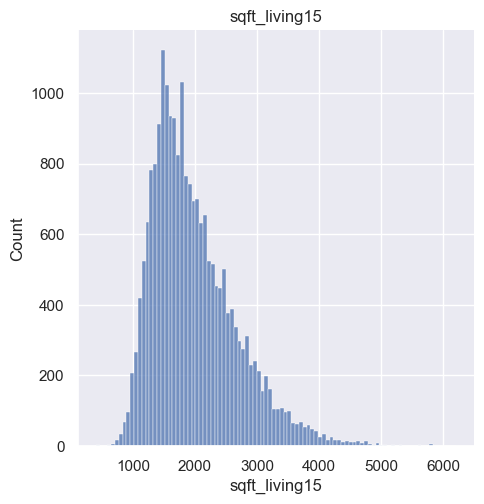

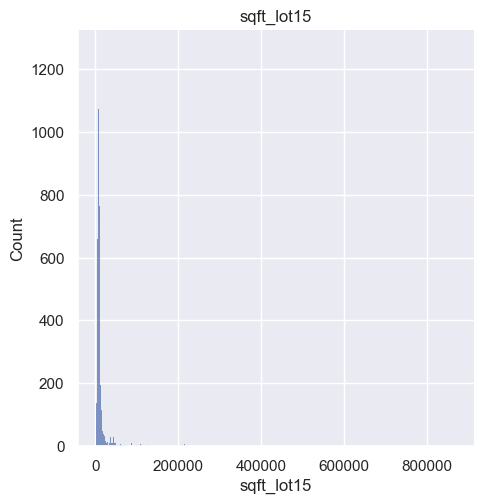

In [92]:
for i in numerical:
    sns.displot(data[i])
    plt.title(i)
    plt.show()

<Axes: xlabel='sqft_living15', ylabel='price'>

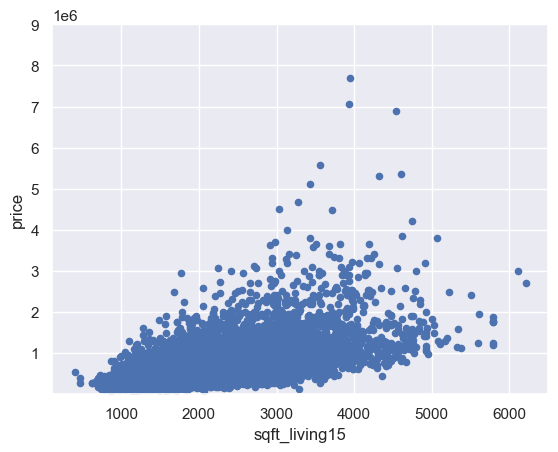

In [93]:
var = 'sqft_living15'
data = pd.concat([data['price'], data[var]], axis=1)
data.plot.scatter(x=var, y='price', ylim=(3,9000000))

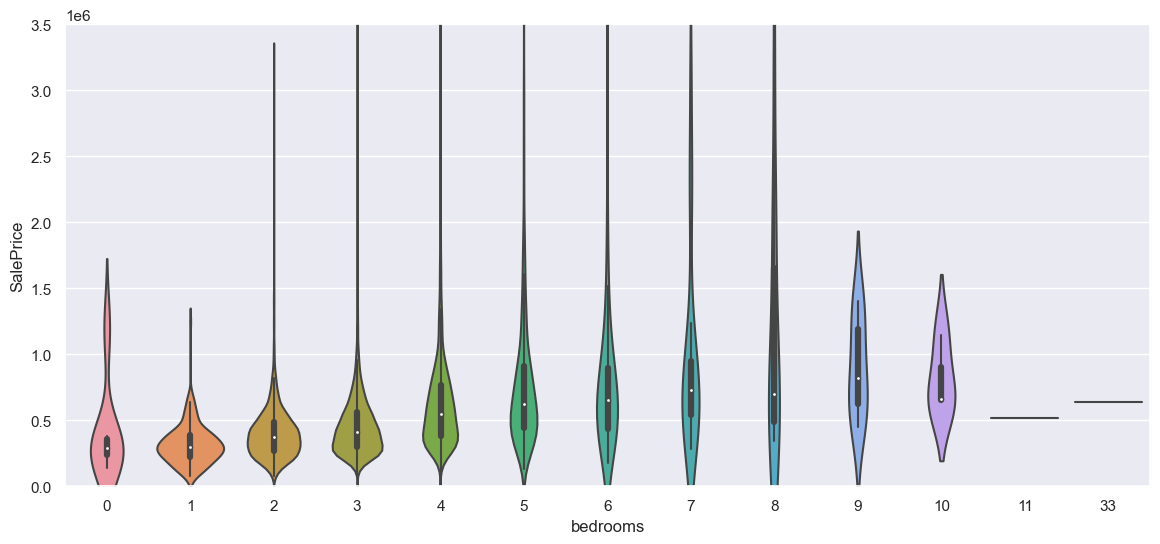

In [94]:
var = 'bedrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

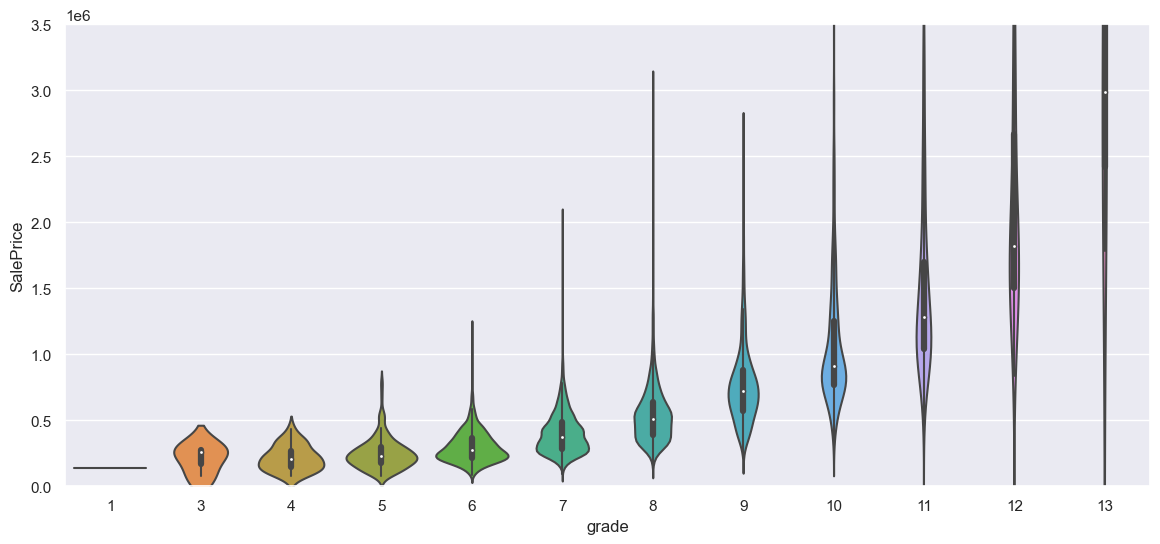

In [95]:
var = 'grade'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.violinplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

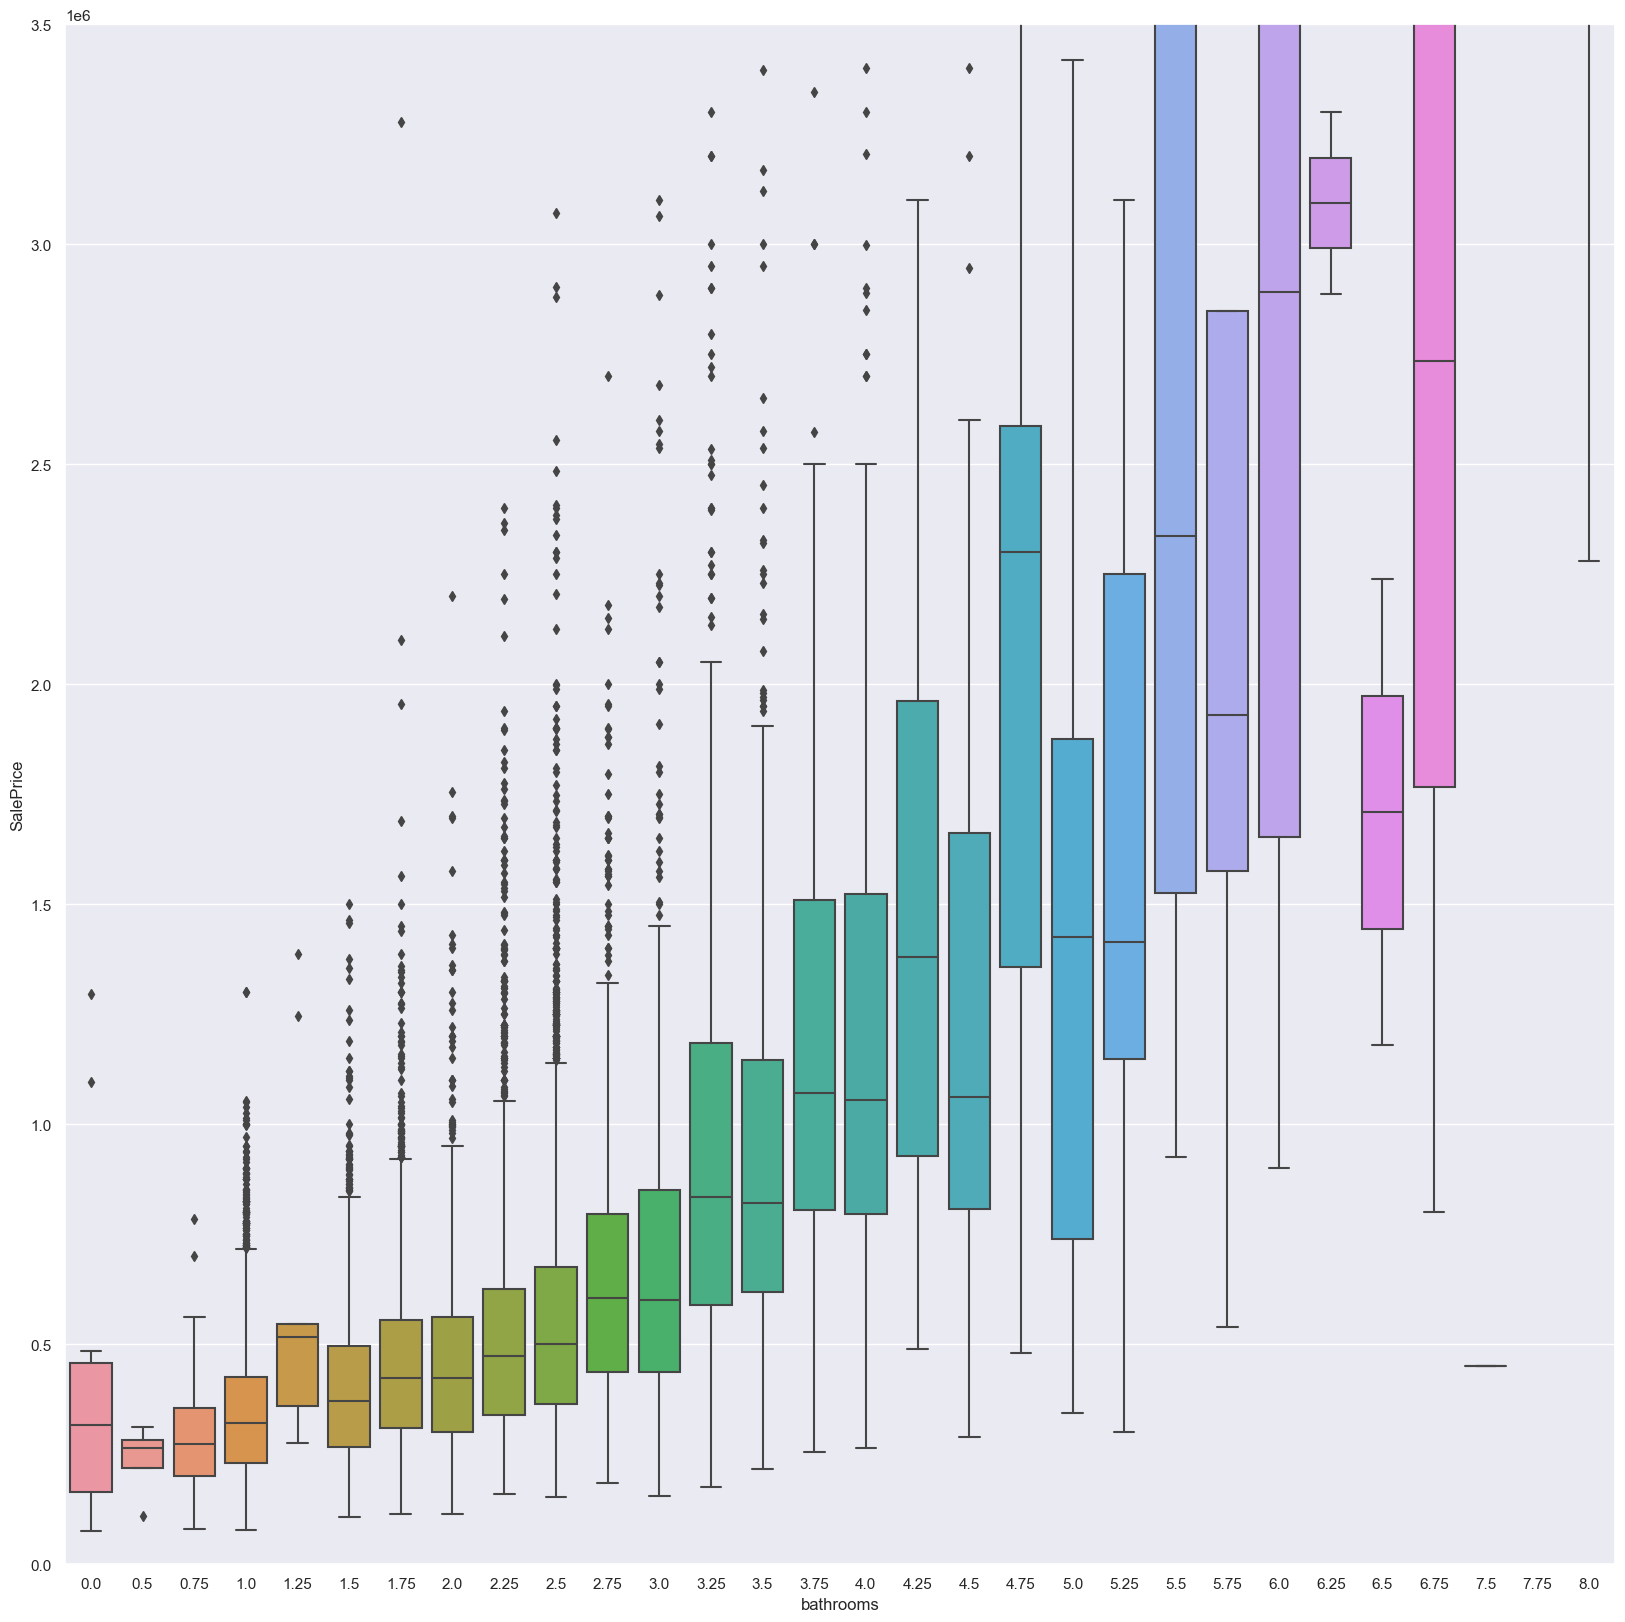

In [96]:
var = 'bathrooms'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

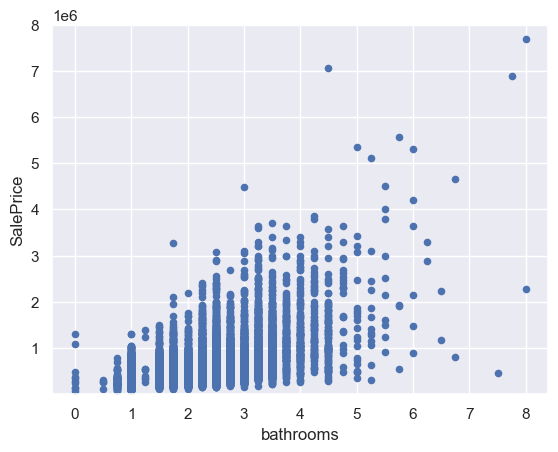

In [97]:
ar = 'sqft_living'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(3,8000000));

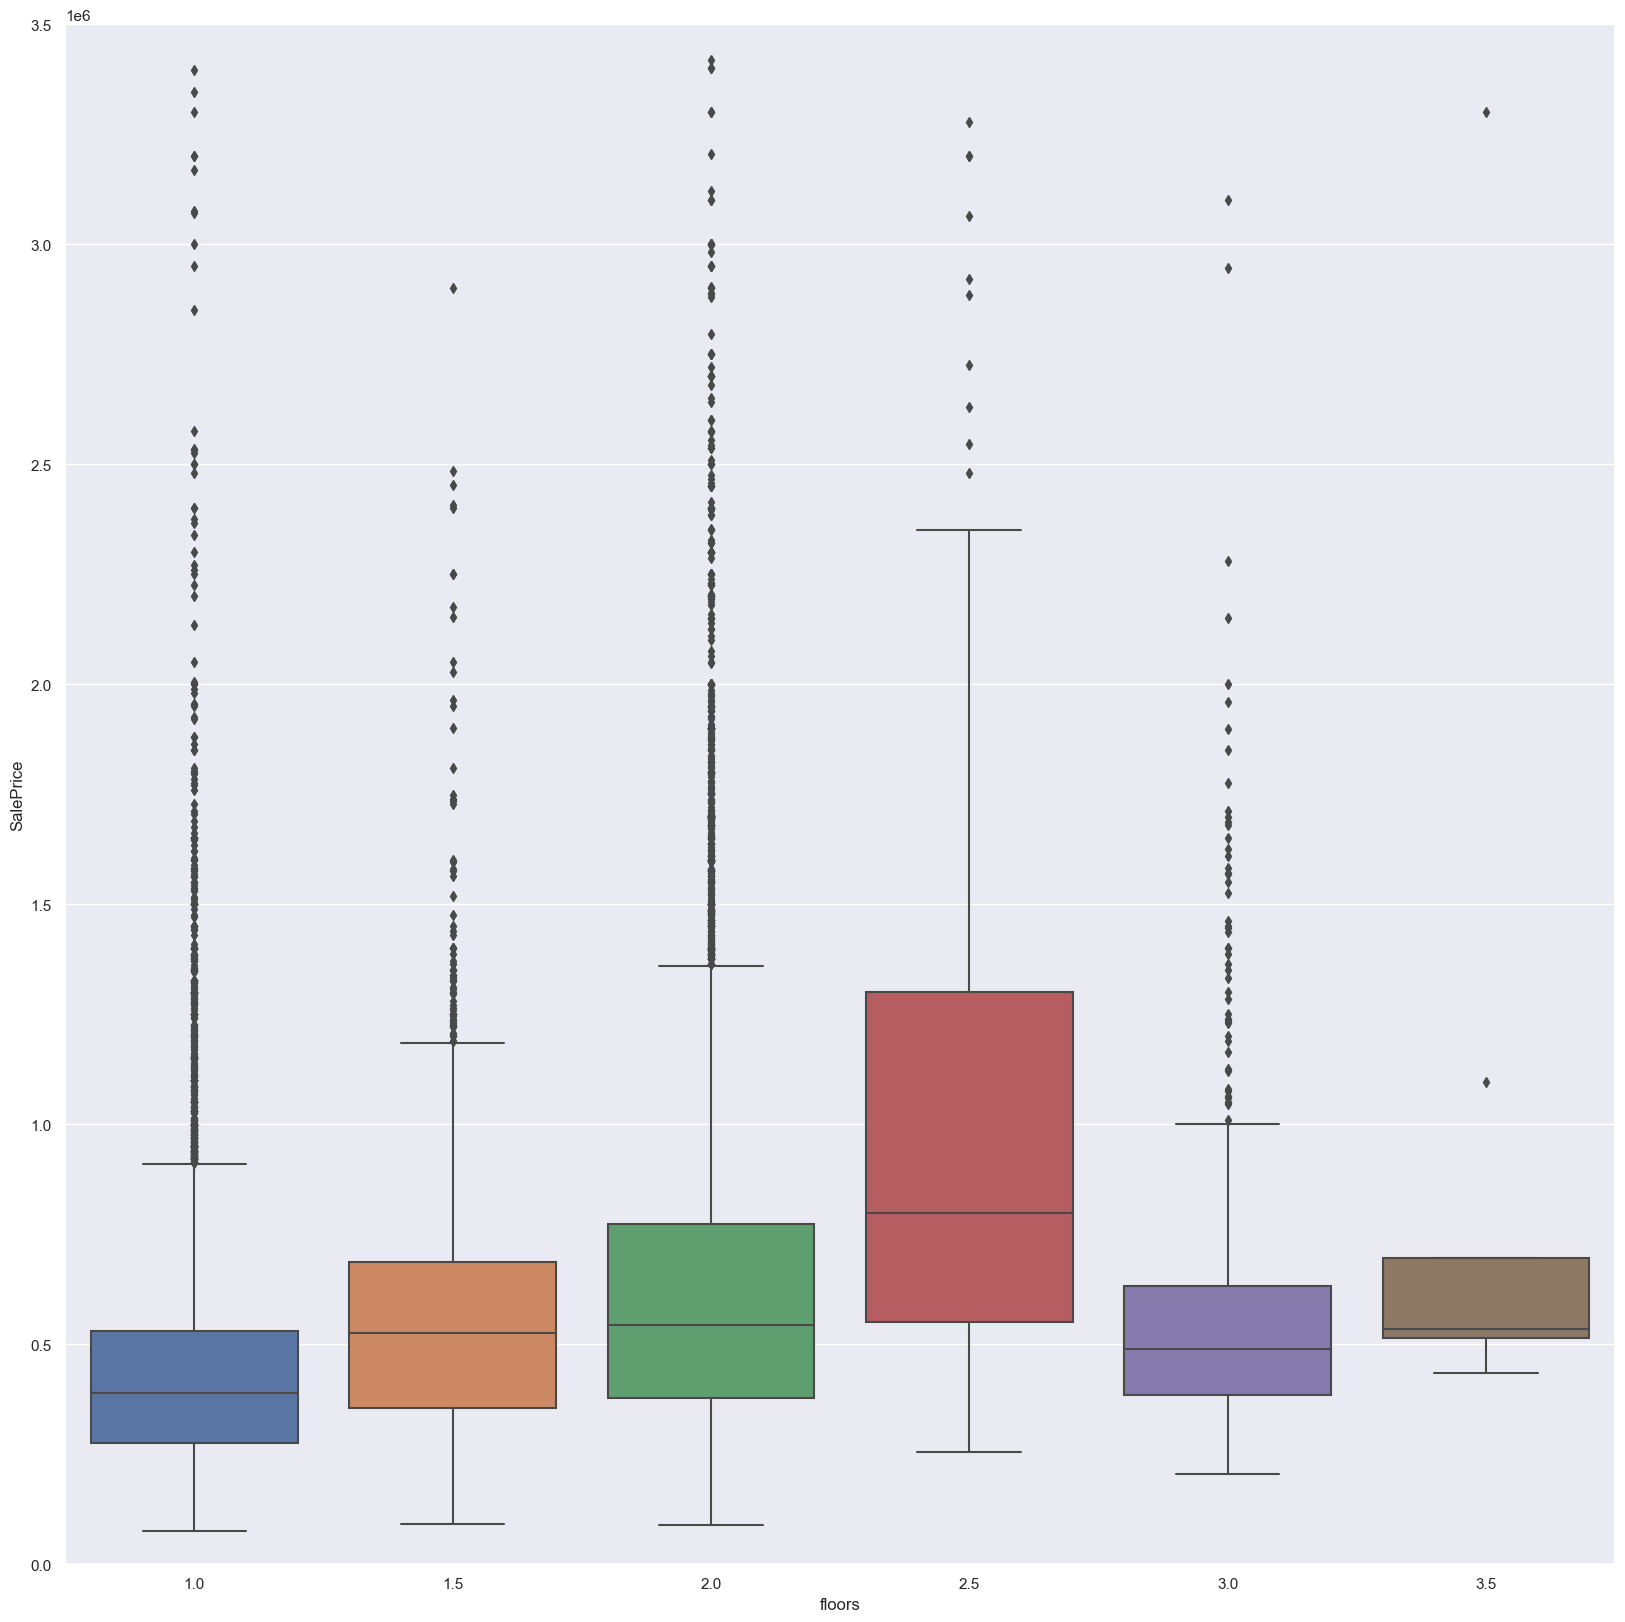

In [98]:
var = 'floors'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 20))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=3500000);

Pairplots to visualize strong correlation

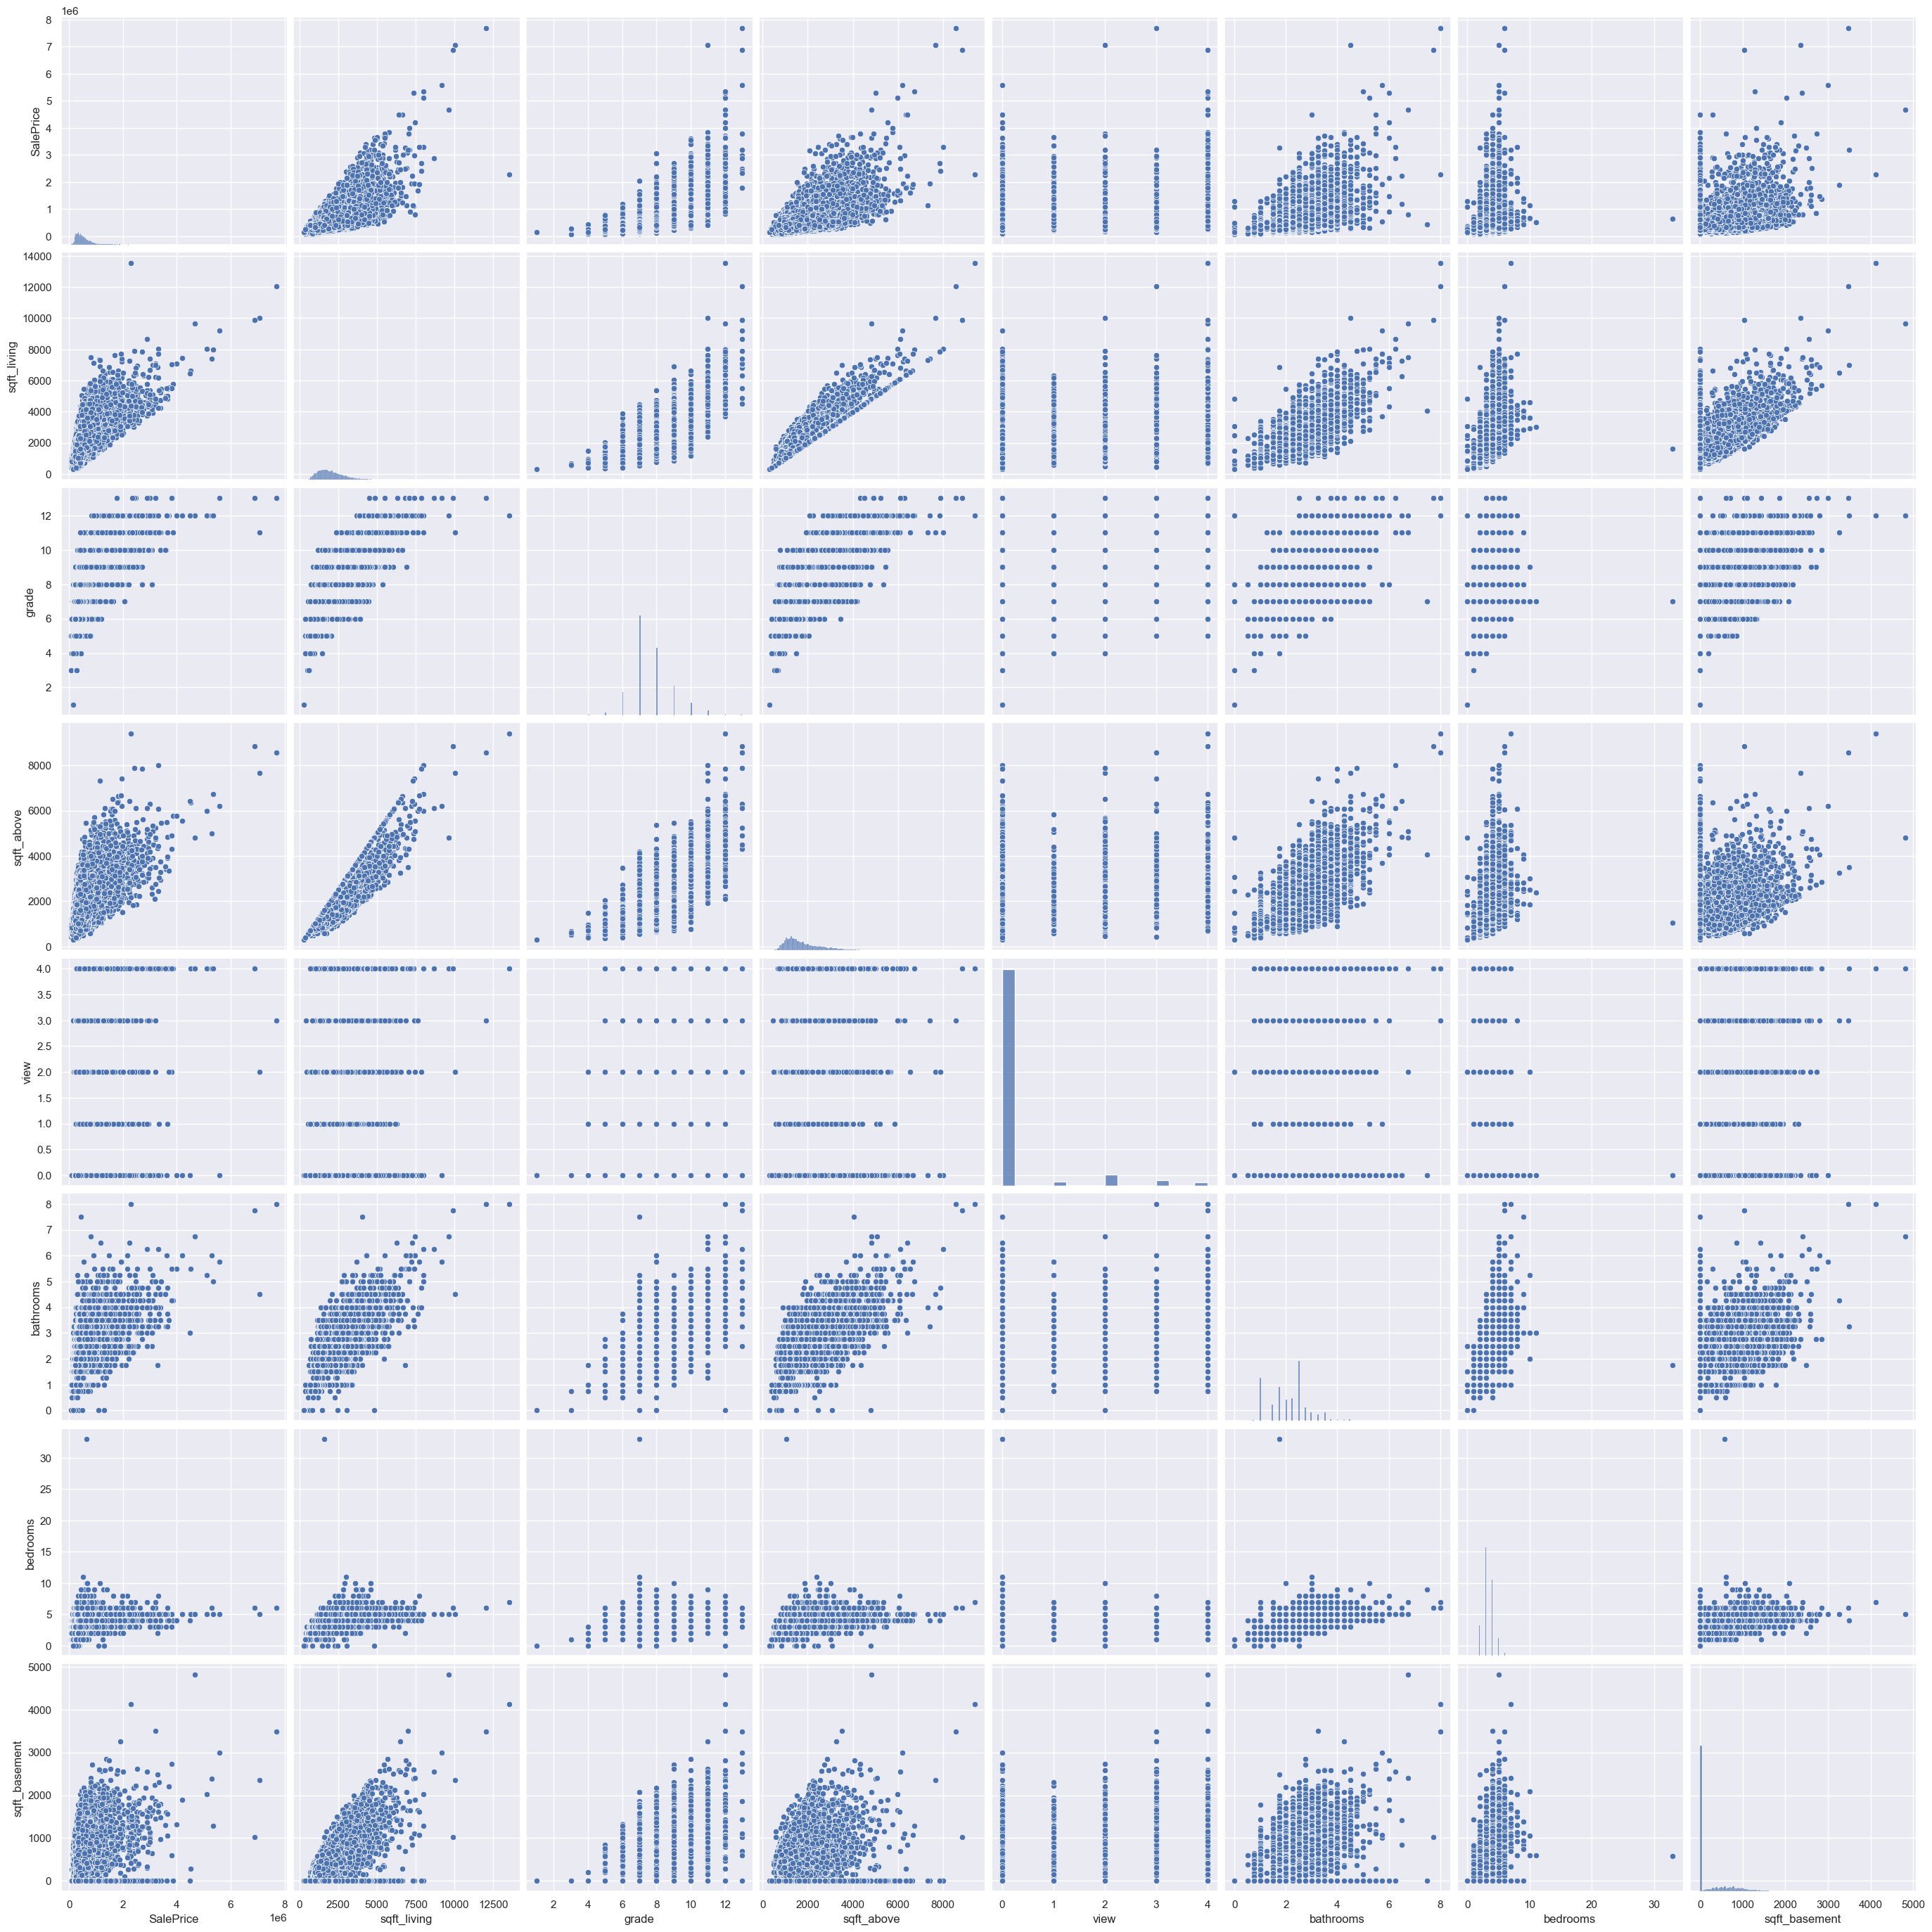

In [99]:
sns.set()
cols = ['SalePrice', 'sqft_living', 'grade', 'sqft_above', 'view', 'bathrooms','bedrooms','sqft_basement']
sns.pairplot(df_train[cols], height = 3.5)
plt.show()

In [100]:
new_data = df_train[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view','sqft_basement','waterfront','yr_built','lat','bedrooms','long']]

In [101]:
X = new_data.values
y = df_train.SalePrice.values

<p><strong>SPLITTING DATA INTO TRAINING AND TESTING SET 🤖<br /></strong></p>

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2)

In [103]:
from sklearn.ensemble import RandomForestRegressor
rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

print('Total Time Taken',train_time_rand)
exp_rand

Total Time Taken 41.23066830635071


0.8651670497276803

<p><strong>Gradient Boosting🔥</strong></p>

In [104]:
from sklearn.ensemble import GradientBoostingRegressor
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5, loss='squared_error',min_samples_split=2,learning_rate=0.1).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(X_test,y_test)

pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)
print('Total Time Taken',train_time_g)
exp_est


Total Time Taken 14.9345223903656


0.8861569888305245

<p><strong>AdaBoost</strong>🔥</p>

In [105]:
from sklearn.ensemble import AdaBoostRegressor
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

print('Total Time Taken',train_time_ada)
exp_ada

Total Time Taken 1.3133995532989502


0.5152373036691964

<p><strong>Decision Tree🌴</strong></p>

In [106]:
from sklearn.tree  import DecisionTreeRegressor
decision=DecisionTreeRegressor()
start = time()
decision.fit(X_train, y_train)
end=time()
train_time_dec=end-start
decc=decision.score(X_test,y_test)
decpredict = decision.predict(X_test)
exp_dec = explained_variance_score(decpredict,y_test)

print('Total Time Taken',train_time_dec)
exp_dec

Total Time Taken 0.13651037216186523


0.7223409840815802

<p><strong>Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models ⚖</strong></p>

In [107]:
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest','Decision Tree'],
    'Score': [gradient,adab,random,decc],
     'Variance Score': [exp_est,exp_ada,exp_rand,exp_dec]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
0,Gradient Boosting,0.897413,0.886157
2,Random Forest,0.884972,0.865167
3,Decision Tree,0.744375,0.722341
1,AdaBoost,0.676615,0.515237


<p><strong>ANALYZING TRAINING TIME EACH MODEL HAS TAKEN ⏳<br /></strong></p>

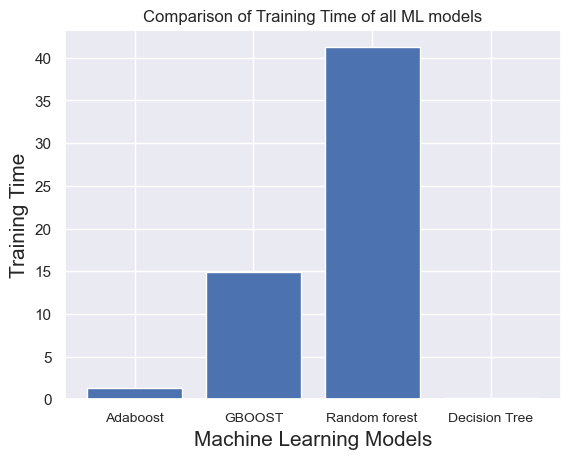

In [108]:
import matplotlib.pyplot as plt
import numpy as np
model = ['Adaboost', 'GBOOST', 'Random forest', 'Decision Tree']
Train_Time = [
    train_time_ada,
    train_time_g,
    train_time_rand,
    train_time_dec]
index = np.arange(len(model))
plt.bar(index, Train_Time)
plt.xlabel('Machine Learning Models', fontsize=15)
plt.ylabel('Training Time', fontsize=15)
plt.xticks(index, model, fontsize=10, )
plt.title('Comparison of Training Time of all ML models')
plt.show()

